<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-откртие-файла" data-toc-modified-id="Импорт-библиотек-и-откртие-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек и откртие файла</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Train" data-toc-modified-id="Train-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Train</a></span><ul class="toc-item"><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Пропуски</a></span></li></ul></li><li><span><a href="#Тест" data-toc-modified-id="Тест-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Тест</a></span><ul class="toc-item"><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Пропуски</a></span></li></ul></li><li><span><a href="#Описание-столбцов-(параметров-объекта):" data-toc-modified-id="Описание-столбцов-(параметров-объекта):-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Описание столбцов (параметров объекта):</a></span></li><li><span><a href="#Визуализация" data-toc-modified-id="Визуализация-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Визуализация</a></span></li><li><span><a href="#Добавление-признаков" data-toc-modified-id="Добавление-признаков-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Добавление признаков</a></span><ul class="toc-item"><li><span><a href="#Train" data-toc-modified-id="Train-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Тест" data-toc-modified-id="Тест-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Тест</a></span></li></ul></li><li><span><a href="#Взаимосвязь" data-toc-modified-id="Взаимосвязь-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Взаимосвязь</a></span></li><li><span><a href="#Удаление-признаков" data-toc-modified-id="Удаление-признаков-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Удаление признаков</a></span></li><li><span><a href="#Кодировка-категориальных-признаков" data-toc-modified-id="Кодировка-категориальных-признаков-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Кодировка категориальных признаков</a></span></li></ul></li><li><span><a href="#Моделирование" data-toc-modified-id="Моделирование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Моделирование</a></span><ul class="toc-item"><li><span><a href="#Разделение-выборок" data-toc-modified-id="Разделение-выборок-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Разделение выборок</a></span><ul class="toc-item"><li><span><a href="#Без-кодировки" data-toc-modified-id="Без-кодировки-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Без кодировки</a></span></li><li><span><a href="#OHE" data-toc-modified-id="OHE-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>OHE</a></span></li></ul></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Полные-данные" data-toc-modified-id="Полные-данные-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Полные данные</a></span></li><li><span><a href="#Важность-признаков" data-toc-modified-id="Важность-признаков-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Важность признаков</a></span></li><li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li></ul></li><li><span><a href="#Запись-результата" data-toc-modified-id="Запись-результата-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Запись результата</a></span></li></ul></div>

# Кагл Леопард

**Задача регрессии на предсказание цен на недвижимость в Мельбурне**

Исходные обучающие данные и трнировочные без целевого признака, проанализированы и подготовлены к обучению моделей.<br>
Изначально обучалсь линейные модели, лес, `CatBoost` и `LGBM`, но исходя из поученного результата, для работы оставлена только модель `CatBoost`.<br>
Это первое соревнование для меня.

## Импорт библиотек и откртие файла

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from catboost import CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from catboost import Pool, cv
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_percentage_error
import optuna
from sklearn.model_selection import cross_val_score
import phik
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
import math
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)

ModuleNotFoundError: ignored

In [ ]:
train=pd.read_csv(r'C:\data\kollab\train.csv', sep=',')
pd.set_option('display.max_columns', None) 

In [ ]:
df=pd.read_csv(r'C:\data\kollab\test.csv', sep=',')
pd.set_option('display.max_columns', None) 

## Анализ данных

### Train

In [ ]:
def evaluation(data): #Функция для вывода общей информации о таблице: статистика, пропуски, дубликаты и т.д.
    information=(display('ИНФОРМАЦИЯ О ДАННЫХ',data.head(5)), display(data.info()), display('СТАТИСТИКА',data.describe()), display(data.describe(include=['object', 'bool'])), display('ЗАВИСИМОСТЬ ПРИЗНАКОВ',data.corr()), display('ПРОЦЕНТ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ',data.isna().mean()*100), display('ДУБЛИКАТЫ',data.duplicated().sum()))
    return information

evaluation(train)      

'ИНФОРМАЦИЯ О ДАННЫХ'

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,34302
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,33247
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,31886
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,18999
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,16809


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18373 entries, 0 to 18372
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18373 non-null  object 
 1   Address        18373 non-null  object 
 2   Rooms          18373 non-null  int64  
 3   Type           18373 non-null  object 
 4   Price          18373 non-null  float64
 5   Method         18373 non-null  object 
 6   SellerG        18373 non-null  object 
 7   Date           18373 non-null  object 
 8   Distance       18373 non-null  float64
 9   Postcode       18373 non-null  float64
 10  Bedroom2       14905 non-null  float64
 11  Bathroom       14903 non-null  float64
 12  Car            14798 non-null  float64
 13  Landsize       13579 non-null  float64
 14  BuildingArea   7750 non-null   float64
 15  YearBuilt      8944 non-null   float64
 16  CouncilArea    18372 non-null  object 
 17  Lattitude      15041 non-null  float64
 18  Longti

None

'СТАТИСТИКА'

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,id
count,18373.000000,1.837300e+04,18373.000000,18373.000000,14905.000000,14903.000000,14798.000000,13579.000000,7750.000000,8944.000000,15041.000000,15041.000000,18372.000000,18373.000000
mean,2.936592,1.053235e+06,10.403962,3107.258314,2.914928,1.538683,1.617313,558.937403,151.133167,1965.925089,-37.809872,144.996486,7518.621489,17490.731889
std,0.955952,6.217973e+05,6.018424,95.285542,0.962743,0.688374,0.957072,3991.516323,519.517626,36.958956,0.081272,0.106536,4487.143499,10075.864589
min,1.000000,2.270000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000,2.000000
25%,2.000000,6.350000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1950.000000,-37.858180,144.931400,4294.000000,8749.000000
50%,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803600,145.001100,6567.000000,17497.000000
75%,3.000000,1.301000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,173.862500,2000.000000,-37.756100,145.060190,10331.000000,26286.000000
max,12.000000,5.580000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000,34856.000000


,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,18373,18373,18373,18373,18373,18373,18372,18372
unique,329,18112,3,5,305,59,33,8
top,Reservoir,28 Blair St,h,S,Nelson,27/05/2017,Boroondara City Council,Southern Metropolitan
freq,540,3,12091,12025,2001,610,1896,6326


'ЗАВИСИМОСТЬ ПРИЗНАКОВ'

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,id
Rooms,1.000000,0.499639,0.289296,0.063347,0.948558,0.597412,0.412486,0.026276,0.126645,-0.056456,0.021266,0.092957,-0.091478,0.004325
Price,0.499639,1.000000,-0.172521,0.097487,0.477260,0.463648,0.238572,0.037681,0.094909,-0.326959,-0.206103,0.198808,-0.053093,-0.004071
Distance,0.289296,-0.172521,1.000000,0.445167,0.297242,0.134004,0.261796,0.025639,0.094182,0.250387,-0.134965,0.235059,-0.062055,0.009637
Postcode,0.063347,0.097487,0.445167,1.000000,0.065251,0.116897,0.057261,0.025634,0.051450,0.045513,-0.384734,0.433615,0.043574,-0.002026
Bedroom2,0.948558,0.477260,0.297242,0.065251,1.000000,0.589781,0.409478,0.026252,0.124850,-0.044475,0.019054,0.096736,-0.081073,0.003916
Bathroom,0.597412,0.463648,0.134004,0.116897,0.589781,1.000000,0.324802,0.037824,0.114884,0.161851,-0.064928,0.118039,-0.051356,0.002075
Car,0.412486,0.238572,0.261796,0.057261,0.409478,0.324802,1.000000,0.026891,0.096393,0.109409,-0.004129,0.063781,-0.023414,0.015916
Landsize,0.026276,0.037681,0.025639,0.025634,0.026252,0.037824,0.026891,1.000000,0.500572,0.037400,0.009538,0.011460,-0.007011,0.003446
BuildingArea,0.126645,0.094909,0.094182,0.051450,0.124850,0.114884,0.096393,0.500572,1.000000,0.026426,0.040215,-0.021007,-0.027900,-0.003004
YearBuilt,-0.056456,-0.326959,0.250387,0.045513,-0.044475,0.161851,0.109409,0.037400,0.026426,1.000000,0.063608,-0.002722,0.007249,0.019772


'ПРОЦЕНТ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ'

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2         18.875524
Bathroom         18.886409
Car              19.457900
Landsize         26.092636
BuildingArea     57.818538
YearBuilt        51.319872
CouncilArea       0.005443
Lattitude        18.135307
Longtitude       18.135307
Regionname        0.005443
Propertycount     0.005443
id                0.000000
dtype: float64

'ДУБЛИКАТЫ'

0

(None, None, None, None, None, None, None)

#### Пропуски

*Здесь и в тестовых данных пропуски заполняла методом  `ffill`, для заполнения ближайшим значением и методом `interpolate` (конечный результат не меняется), сохраняющим распределение. Удалять единичны пропуски не стала, поскольку Кагл уменьшенный тест не принимает.*

In [ ]:
train.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          3468
Bathroom          3470
Car               3575
Landsize          4794
BuildingArea     10623
YearBuilt         9429
CouncilArea          1
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
id                   0
dtype: int64

In [ ]:
train['YearBuilt']=train['YearBuilt'].fillna(train['YearBuilt'].median())
#train['YearBuilt']=train['YearBuilt'].ffill()
train.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          3468
Bathroom          3470
Car               3575
Landsize          4794
BuildingArea     10623
YearBuilt            0
CouncilArea          1
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
id                   0
dtype: int64

In [ ]:
#train=train.ffill()
train=train.interpolate()
train.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     1
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
id               0
dtype: int64

In [ ]:
train=train.fillna(0)
train.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
id               0
dtype: int64

### Тест

In [ ]:
evaluation(df)    

'ИНФОРМАЦИЯ О ДАННЫХ'

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
0,Abbotsford,513/6 Acacia Pl,3,u,S,Dingle,7/10/2017,3.0,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0,30130
1,Abbotsford,60 Charles St,3,h,S,Jellis,7/10/2017,3.0,3067.0,3.0,1.0,NaN,192.0,109.0,1900.0,Yarra City Council,-37.80792,144.99508,Northern Metropolitan,4019.0,18311
2,Abbotsford,38 Studley St,3,h,S,Nelson,7/10/2017,3.0,3067.0,3.0,1.0,1.0,159.0,93.0,1890.0,Yarra City Council,-37.80124,144.99459,Northern Metropolitan,4019.0,18934
3,Airport West,18 Glenys Av,3,h,S,Raine,7/10/2017,10.4,3042.0,3.0,1.0,5.0,536.0,108.0,1980.0,Moonee Valley City Council,-37.72285,144.87539,Western Metropolitan,3464.0,1824
4,Airport West,35 Thomas St,3,h,S,Nelson,7/10/2017,10.4,3042.0,3.0,1.0,1.0,NaN,130.0,2009.0,Moonee Valley City Council,-37.71754,144.87704,Western Metropolitan,3464.0,31339


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8818 entries, 0 to 8817
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8818 non-null   object 
 1   Address        8818 non-null   object 
 2   Rooms          8818 non-null   int64  
 3   Type           8818 non-null   object 
 4   Method         8818 non-null   object 
 5   SellerG        8818 non-null   object 
 6   Date           8818 non-null   object 
 7   Distance       8817 non-null   float64
 8   Postcode       8817 non-null   float64
 9   Bedroom2       5858 non-null   float64
 10  Bathroom       5854 non-null   float64
 11  Car            5582 non-null   float64
 12  Landsize       4365 non-null   float64
 13  BuildingArea   2882 non-null   float64
 14  YearBuilt      3112 non-null   float64
 15  CouncilArea    8816 non-null   object 
 16  Lattitude      5908 non-null   float64
 17  Longtitude     5908 non-null   float64
 18  Regionna

None

'СТАТИСТИКА'

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,id
count,8818.000000,8817.000000,8817.000000,5858.000000,5854.000000,5582.000000,4365.000000,2882.000000,3112.000000,5908.000000,5908.000000,8816.000000,8818.000000
mean,3.109549,13.134127,3127.554384,3.381871,1.724120,1.976173,700.659336,171.632200,1968.751928,-37.799458,144.997531,7668.367627,17295.584826
std,0.934280,7.852206,137.628532,0.837767,0.708429,1.040295,2928.526260,140.695197,35.968997,0.113661,0.150998,4498.895777,10008.851866
min,1.000000,0.000000,3000.000000,1.000000,1.000000,0.000000,29.000000,0.000000,1820.000000,-38.190430,144.423790,83.000000,1.000000
25%,3.000000,7.200000,3047.000000,3.000000,1.000000,1.000000,410.000000,118.000000,1950.000000,-37.871178,144.907508,4380.000000,8620.750000
50%,3.000000,12.000000,3095.000000,3.000000,2.000000,2.000000,587.000000,151.000000,1975.000000,-37.791325,145.012550,6763.000000,17271.500000
75%,4.000000,17.300000,3165.000000,4.000000,2.000000,2.000000,696.000000,200.000000,2000.000000,-37.723930,145.092100,10529.000000,25942.500000
max,16.000000,48.100000,3978.000000,16.000000,9.000000,18.000000,146699.000000,6178.000000,2019.000000,-37.397800,145.523700,21650.000000,34846.000000


,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,8818,8818,8818,8818,8818,8818,8816,8816
unique,332,8763,3,5,238,19,33,8
top,Reservoir,3/28 Lerina St,h,S,Barry,28/10/2017,Darebin City Council,Northern Metropolitan
freq,185,2,6352,5465,1000,876,632,2551


'ЗАВИСИМОСТЬ ПРИЗНАКОВ'

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,id
Rooms,1.000000,0.259998,0.091161,0.983227,0.611248,0.263438,0.056849,0.343055,0.167979,-0.008011,0.080779,-0.060137,-0.006924
Distance,0.259998,1.000000,0.529044,0.137809,0.088528,0.123420,0.145816,0.021718,0.475364,-0.065691,0.138158,0.033224,0.004653
Postcode,0.091161,0.529044,1.000000,0.075555,0.113036,0.032098,0.071840,0.034988,0.191444,-0.047136,0.292554,-0.008522,0.013175
Bedroom2,0.983227,0.137809,0.075555,1.000000,0.622422,0.275880,0.055910,0.344005,0.168409,-0.010076,0.085752,-0.015302,-0.001211
Bathroom,0.611248,0.088528,0.113036,0.622422,1.000000,0.205592,0.028673,0.352386,0.266096,-0.033918,0.081020,-0.018703,-0.014259
Car,0.263438,0.123420,0.032098,0.275880,0.205592,1.000000,0.037549,0.128865,0.152099,-0.008318,-0.006259,0.001483,-0.008988
Landsize,0.056849,0.145816,0.071840,0.055910,0.028673,0.037549,1.000000,0.037027,0.050904,0.066373,-0.049632,-0.060427,0.000257
BuildingArea,0.343055,0.021718,0.034988,0.344005,0.352386,0.128865,0.037027,1.000000,0.213500,-0.046754,0.045212,-0.038351,-0.020819
YearBuilt,0.167979,0.475364,0.191444,0.168409,0.266096,0.152099,0.050904,0.213500,1.000000,0.158466,-0.058582,0.068369,-0.019803
Lattitude,-0.008011,-0.065691,-0.047136,-0.010076,-0.033918,-0.008318,0.066373,-0.046754,0.158466,1.000000,-0.331208,-0.014750,-0.021556


'ПРОЦЕНТ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ'

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.011340
Postcode          0.011340
Bedroom2         33.567702
Bathroom         33.613064
Car              36.697664
Landsize         50.498979
BuildingArea     67.316852
YearBuilt        64.708551
CouncilArea       0.022681
Lattitude        33.000680
Longtitude       33.000680
Regionname        0.022681
Propertycount     0.022681
id                0.000000
dtype: float64

'ДУБЛИКАТЫ'

0

(None, None, None, None, None, None, None)

#### Пропуски

In [ ]:
df.isna().sum()


Suburb              0
Address             0
Rooms               0
Type                0
Method              0
SellerG             0
Date                0
Distance            1
Postcode            1
Bedroom2         2960
Bathroom         2964
Car              3236
Landsize         4453
BuildingArea     5936
YearBuilt        5706
CouncilArea         2
Lattitude        2910
Longtitude       2910
Regionname          2
Propertycount       2
id                  0
dtype: int64

In [ ]:
df['YearBuilt']=df['YearBuilt'].fillna(df['YearBuilt'].median())
#df['YearBuilt']=df['YearBuilt'].ffill()
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Method              0
SellerG             0
Date                0
Distance            1
Postcode            1
Bedroom2         2960
Bathroom         2964
Car              3236
Landsize         4453
BuildingArea     5936
YearBuilt           0
CouncilArea         2
Lattitude        2910
Longtitude       2910
Regionname          2
Propertycount       2
id                  0
dtype: int64

In [ ]:
#df=df.ffill()
df=df.interpolate()
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         1
Bathroom         1
Car              2
Landsize         1
BuildingArea     1
YearBuilt        0
CouncilArea      0
Lattitude        1
Longtitude       1
Regionname       0
Propertycount    0
id               0
dtype: int64

In [ ]:
df=df.fillna(0)
df.isna().sum()


Suburb           0
Address          0
Rooms            0
Type             0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
id               0
dtype: int64

### Описание столбцов (параметров объекта):

Suburb – Район<br>
Address – адрес<br>
Rooms – количество комнат<br>
Type – тип объекта
    br - bedroom(s);<br>
    h - house,cottage,villa, semi,terrace;<br>
    u - unit, duplex;<br>
    t - townhouse;<br>
    dev site - development site;<br>
    o res - other residential.<br>
   Price – цена объекта<br>
Method – метод продажи объекта:
    S - property sold;
    SP - property sold prior;
    PI - property passed in;
    PN - sold prior not disclosed;
    SN - sold not disclosed;
    NB - no bid;
    VB - vendor bid;
    W - withdrawn prior to auction;
    SA - sold after auction;
    SS - sold after auction price not disclosed.
    N/A - price or highest bid not available.
SellerG – имя риэлтора<br>
Date – дата продажи объекта<br>
Distance – расстояние до центрального района в километрах<br>
Postcode – почтовый индекс<br>
Bedrooms2 – количество спален<br>
Bathroom – количество ванных комнат<br>
Car – количество парковочных мест<br>
Landsize – площадь прилегающей территории<br>
BuildingArea – площадь самого объекта<br>
YearBuilt – год постройки<br>
CouncilArea – округ<br>
Lattitude – широта Longtitude – долгота<br>
Regionname – еще одно административное деление на подобие округа<br>
Propertycount – не совсем ясно что, возможно количество объектов в округе<br>
id – id объекта

### Визуализация

In [ ]:
(train.drop(['id','Postcode'],axis=1)).hist(figsize=(20, 18))

In [ ]:
(df.drop(['id','Postcode'],axis=1)).hist(figsize=(20, 18))

**Некотоные данные скошены, а в некоторых признаках распределение обучаюей  тестовой выборки существенно отличается. Для использовния линйных моделй необходимо убрать скошенность.<br>
Анализировать на наличие выбросов не стала, поскольку удаление выбивающихся значений приведёт к уменьшению датасетов, в том числе и тестовом (при уменьшении количества строк, тест на кагл не загрузится.**

### Добавление признаков

**Признаки добавляла используя различные способы, однако в окончатеьном варианте оставиле только те, которые достаточно значимы**

#### Train

In [ ]:
train['new']=train['Price']/(train['Rooms']/(train['Bedroom2']+train['Bathroom']))

#### Тест

In [ ]:
df['new']=train['Price']/(df['Rooms']/(df['Bedroom2']+df['Bathroom']))

### Взаимосвязь

In [ ]:
train.corr()

**Добавляю шум, чтобы уменьшить корреляцию**

In [ ]:
def makeNoise(ds, k1=3,k2=5, k3=150):
    import random
    import math as mt
    if ds.dtype == object:
        array = pd.Series.to_numpy(ds)
        array = array.astype(float)
    else:
        array = ds.astype(float)
            
    for i in range(len(ds)):
        k = mt.cos(i*math.pi/k3)
        array[i] = array[i]*(k2+k+(random.random()-0.5)/k1)/k2
        #print((7+k+(random.random()-0.5)/k1)/k2)
    #ds = pd.Series(array)
    return array

train['Bedroom2']=makeNoise(train['Bedroom2'])
df['Bedroom2']=makeNoise(df['Bedroom2'])

In [ ]:
train['Longtitude']=makeNoise(train['Longtitude'])
df['Longtitude']=makeNoise(df['Longtitude'])

In [ ]:
train['new']=makeNoise(train['new'])
df['new']=makeNoise(df['new'])

In [ ]:
train.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,id,new
Rooms,1.000000,0.499639,0.289296,0.063347,0.651116,0.496155,0.355282,0.023772,0.070830,-0.039346,0.010947,-0.006959,-0.091476,0.004325,0.288616
Price,0.499639,1.000000,-0.172521,0.097487,0.339929,0.391480,0.196194,0.030390,0.052263,-0.231596,-0.209962,0.030750,-0.053093,-0.004071,0.797420
Distance,0.289296,-0.172521,1.000000,0.445167,0.224621,0.126292,0.246682,0.028271,0.088187,0.180918,-0.125322,-0.021981,-0.062055,0.009637,-0.160164
Postcode,0.063347,0.097487,0.445167,1.000000,0.060053,0.107948,0.046251,0.022129,0.049321,0.031766,-0.374541,0.011757,0.043572,-0.002026,0.097859
Bedroom2,0.651116,0.339929,0.224621,0.060053,1.000000,0.489153,0.352777,0.023145,0.058431,-0.020647,-0.009191,0.356946,-0.066424,0.006830,0.555944
Bathroom,0.496155,0.391480,0.126292,0.107948,0.489153,1.000000,0.322895,0.037436,0.068681,0.109463,-0.065237,-0.005382,-0.055562,0.000031,0.483222
Car,0.355282,0.196194,0.246682,0.046251,0.352777,0.322895,1.000000,0.031335,0.058990,0.075786,-0.010753,0.025358,-0.031435,0.010484,0.201693
Landsize,0.023772,0.030390,0.028271,0.022129,0.023145,0.037436,0.031335,1.000000,0.129818,0.008987,0.011127,-0.009362,-0.006797,0.001131,0.026049
BuildingArea,0.070830,0.052263,0.088187,0.049321,0.058431,0.068681,0.058990,0.129818,1.000000,0.005194,0.033761,-0.004780,-0.027744,-0.011323,0.046703
YearBuilt,-0.039346,-0.231596,0.180918,0.031766,-0.020647,0.109463,0.075786,0.008987,0.005194,1.000000,0.044857,0.005927,0.005571,0.013357,-0.145705


**Помимо проверки линейой корреляции числовых признаков, оценила из зависимость с помощью `Phik`**

In [ ]:
phik_target = train.phik_matrix()

phik_target['Price'].sort_values(ascending=False).round(2)

interval columns not set, guessing: ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount', 'id', 'new']


Price            1.00
Address          0.91
new              0.82
Suburb           0.61
Rooms            0.55
CouncilArea      0.51
Type             0.50
SellerG          0.48
Lattitude        0.37
Bathroom         0.34
Regionname       0.32
Car              0.31
YearBuilt        0.31
Bedroom2         0.29
Postcode         0.28
Propertycount    0.26
Distance         0.23
Method           0.17
Landsize         0.05
Longtitude       0.05
id               0.03
BuildingArea     0.00
Name: Price, dtype: float64

Text(0.5, 1.0, 'Статистическая значимостть признаков')

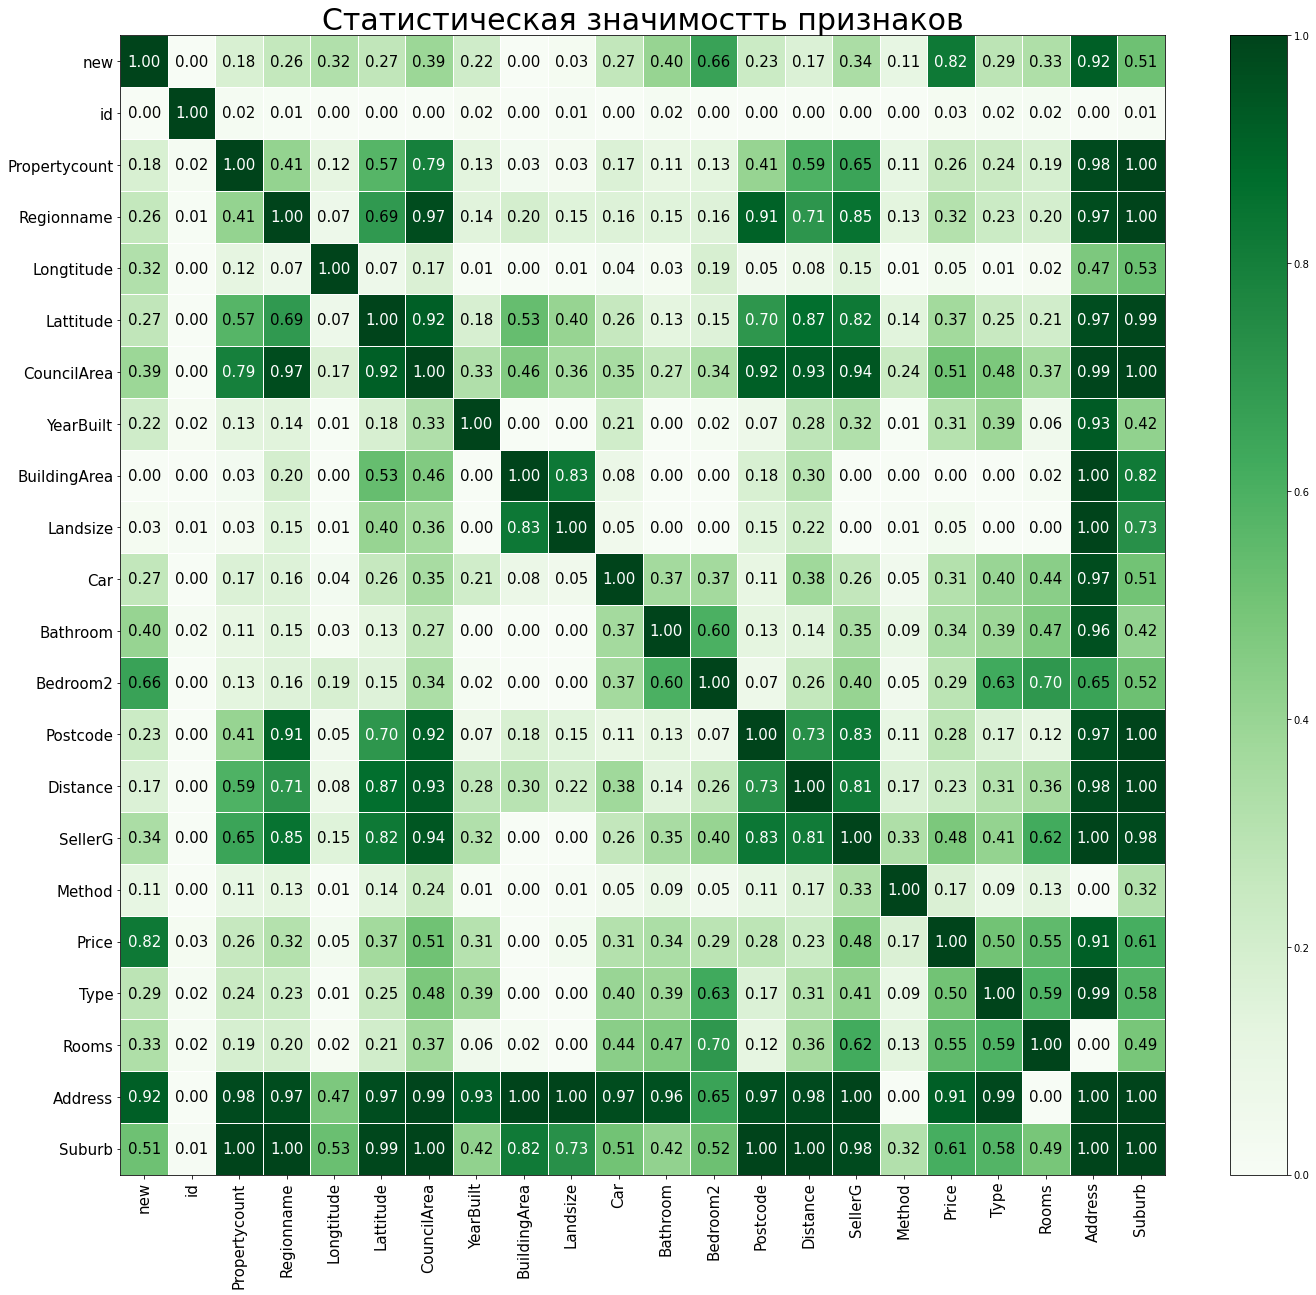

In [ ]:

plot_correlation_matrix(phik_target.values, 
                        x_labels=phik_target.columns, 
                        y_labels=phik_target.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                     
                        fontsize_factor=1.5, 
                        figsize=(20, 18))
plt.tight_layout()
plt.title('Статистическая значимостть признаков', fontsize=30)

### Удаление признаков

**Признаки, которые сильно взаимосвязаны, либо наоборот - мало влияют друг на друга, удалила**

In [ ]:
train=train.drop(['Date','Address'],axis=1)
train.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id,new
0,Abbotsford,2,h,1480000.0,S,Biggin,2.5,3067.0,2.438970,1.0,1.0,202.0,0.0,1970.0,Yarra City Council,-37.7996,178.727862,Northern Metropolitan,4019.0,34302,3.024837e+06
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,3067.0,2.387119,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,173.299003,Northern Metropolitan,4019.0,33247,2.124907e+06
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.603723,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,178.700573,Northern Metropolitan,4019.0,31886,3.252434e+06
3,Abbotsford,3,h,850000.0,PI,Biggin,2.5,3067.0,3.589154,2.0,1.0,94.0,150.0,1970.0,Yarra City Council,-37.7969,178.452896,Northern Metropolitan,4019.0,18999,1.876563e+06
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.671744,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,175.747412,Northern Metropolitan,4019.0,16809,2.213347e+06


In [ ]:
df=df.drop([ 'Date','Address'],axis=1)
df.head()

,Suburb,Rooms,Type,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id,new
0,Abbotsford,3,u,S,Dingle,3.0,3067.0,0.000000,0.0,0.0,0.0,0.0,1975.0,Yarra City Council,0.00000,0.000000,Northern Metropolitan,4019.0,30130,0.000000e+00
1,Abbotsford,3,h,S,Jellis,3.0,3067.0,3.665726,1.0,0.0,192.0,109.0,1900.0,Yarra City Council,-37.80792,175.289833,Northern Metropolitan,4019.0,18311,1.881874e+06
2,Abbotsford,3,h,S,Nelson,3.0,3067.0,3.603931,1.0,1.0,159.0,93.0,1890.0,Yarra City Council,-37.80124,171.938886,Northern Metropolitan,4019.0,18934,2.644669e+06
3,Airport West,3,h,S,Raine,10.4,3042.0,3.644891,1.0,5.0,536.0,108.0,1980.0,Moonee Valley City Council,-37.72285,175.230453,Western Metropolitan,3464.0,1824,1.606186e+06
4,Airport West,3,h,S,Nelson,10.4,3042.0,3.656789,1.0,1.0,536.0,130.0,2009.0,Moonee Valley City Council,-37.71754,169.078846,Western Metropolitan,3464.0,31339,2.975347e+06


### Кодировка категориальных признаков

**Изначально я обучала разные модели, в том числе лес и линейные, поэтому закодировала данные**

In [ ]:
data_ohe = pd.get_dummies(train,drop_first=True)
data_ohe.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,id,new,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brookfield,Suburb_Brooklyn,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulleen,Suburb_Bullengarook,Suburb_Bundoora,Suburb_Burnley,Suburb_Burnside,Suburb_Burnside Heights,Suburb_Burwood,Suburb_Burwood East,Suburb_Cairnlea,Suburb_Camberwell,Suburb_Campbellfield,Suburb_Canterbury,Suburb_Carlton,Suburb_Carlton North,Suburb_Carnegie,Suburb_Caroline Springs,Suburb_Carrum,Suburb_Carrum Downs,Suburb_Caulfield,Suburb_Caulfield East,Suburb_Caulfield North,Suburb_Caulfield South,Suburb_Chadstone,Suburb_Chelsea,Suburb_Chelsea Heights,Suburb_Cheltenham,Suburb_Chirnside Park,Suburb_Clarinda,Suburb_Clayton,Suburb_Clayton South,Suburb_Clifton Hill,Suburb_Clyde North,Suburb_Coburg,Suburb_Coburg North,Suburb_Collingwood,Suburb_Coolaroo,Suburb_Craigieburn,Suburb_Cranbourne,Suburb_Cranbourne East,Suburb_Cranbourne North,Suburb_Cremorne,Suburb_Croydon,Suburb_Croydon Hills,Suburb_Croydon North,Suburb_Croydon South,Suburb_Dallas,Suburb_Dandenong,Suburb_Dandenong North,Suburb_Deepdene,Suburb_Deer Park,Suburb_Delahey,Suburb_Derrimut,Suburb_Diamond Creek,Suburb_Diggers Rest,Suburb_Dingley Village,Suburb_Docklands,Suburb_Doncaster,Suburb_Doncaster East,Suburb_Donvale,Suburb_Doreen,Suburb_Doveton,Suburb_Eaglemont,Suburb_East Melbourne,Suburb_Edithvale,Suburb_Elsternwick,Suburb_Eltham,Suburb_Eltham North,Suburb_Elwood,Suburb_Emerald,Suburb_Endeavour Hills,Suburb_Epping,Suburb_Essendon,Suburb_Essendon North,Suburb_Essendon West,Suburb_Eumemmerring,Suburb_Fairfield,Suburb_Fawkner,Suburb_Ferntree Gully,Suburb_Fitzroy,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Forest Hill,Suburb_Frankston,Suburb_Frankston North,Suburb_Frankston South,Suburb_Gardenvale,Suburb_Gisborne,Suburb_Gladstone Park,Suburb_Glen Huntly,Suburb_Glen Iris,Suburb_Glen Waverley,Suburb_Glenroy,Suburb_Gowanbrae,Suburb_Greensborough,Suburb_Greenvale,Suburb_Hadfield,Suburb_Hallam,Suburb_Hampton,Suburb_Hampton East,Suburb_Hampton Park,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Healesville,Suburb_Heatherton,Suburb_Heathmont,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Highett,Suburb_Hillside,Suburb_Hoppers Crossing,Suburb_Hughesdale,Suburb_Huntingdale,Suburb_Hurstbridge,Suburb_Ivanhoe,Suburb_Ivanhoe East,Suburb_Jacana,Suburb_Kealba,Suburb_Keilor,Suburb_Keilor Downs,Suburb_Keilor East,Suburb_Keilor Lodge,Suburb_Keilor Park,Suburb_Kensington,Suburb_Kew,Suburb_Kew East,Suburb_Keysborough,Suburb_Kilsyth,Suburb_Kings Park,Suburb_Kingsbury,Suburb_Kingsville,Suburb_Knoxfield,Suburb_Kooyong,Suburb_Kurunjang,Suburb_Lalor,Suburb_Langwarrin,Suburb_Laverton,Suburb_Lilydale,Suburb_Lower Plenty,Suburb_Lynbrook,Suburb_MacLeod,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_McKinnon,Suburb_Meadow Heights,Suburb_Melbourne,Suburb_Melton,Suburb_Melton South,Suburb_Melton West,Suburb_Mentone,Suburb_Mernda,Suburb_Mickleham,Suburb_Middle Park,Suburb_Mill Park,Suburb_Mitcham,Suburb_Monbulk,Suburb_Mont Albert,Suburb_Montmorency,Suburb_Montrose,Suburb_Moonee Ponds,Suburb_Moorabbin,Suburb_Mooroolbark,Suburb_Mordiallo

In [ ]:
df_ohe = pd.get_dummies(df,drop_first=True)
df_ohe.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,id,new,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Botanic Ridge,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brookfield,Suburb_Brooklyn,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulla,Suburb_Bulleen,Suburb_Bullengarook,Suburb_Bundoora,Suburb_Burnley,Suburb_Burnside,Suburb_Burnside Heights,Suburb_Burwood,Suburb_Burwood East,Suburb_Cairnlea,Suburb_Camberwell,Suburb_Campbellfield,Suburb_Canterbury,Suburb_Carlton,Suburb_Carlton North,Suburb_Carnegie,Suburb_Caroline Springs,Suburb_Carrum,Suburb_Carrum Downs,Suburb_Caulfield East,Suburb_Caulfield North,Suburb_Caulfield South,Suburb_Chadstone,Suburb_Chelsea,Suburb_Chelsea Heights,Suburb_Cheltenham,Suburb_Chirnside Park,Suburb_Clarinda,Suburb_Clayton,Suburb_Clayton South,Suburb_Clifton Hill,Suburb_Clyde North,Suburb_Coburg,Suburb_Coburg North,Suburb_Coldstream,Suburb_Collingwood,Suburb_Coolaroo,Suburb_Craigieburn,Suburb_Cranbourne,Suburb_Cranbourne North,Suburb_Cranbourne West,Suburb_Cremorne,Suburb_Croydon,Suburb_Croydon Hills,Suburb_Croydon North,Suburb_Croydon South,Suburb_Dallas,Suburb_Dandenong,Suburb_Dandenong North,Suburb_Darley,Suburb_Deepdene,Suburb_Deer Park,Suburb_Delahey,Suburb_Derrimut,Suburb_Diamond Creek,Suburb_Diggers Rest,Suburb_Dingley Village,Suburb_Docklands,Suburb_Doncaster,Suburb_Doncaster East,Suburb_Donvale,Suburb_Doreen,Suburb_Doveton,Suburb_Eaglemont,Suburb_East Melbourne,Suburb_Edithvale,Suburb_Elsternwick,Suburb_Eltham,Suburb_Eltham North,Suburb_Elwood,Suburb_Emerald,Suburb_Endeavour Hills,Suburb_Epping,Suburb_Essendon,Suburb_Essendon North,Suburb_Essendon West,Suburb_Eumemmerring,Suburb_Eynesbury,Suburb_Fairfield,Suburb_Fawkner,Suburb_Fawkner Lot,Suburb_Ferntree Gully,Suburb_Ferny Creek,Suburb_Fitzroy,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Forest Hill,Suburb_Frankston,Suburb_Frankston North,Suburb_Frankston South,Suburb_Gardenvale,Suburb_Gisborne,Suburb_Gisborne South,Suburb_Gladstone Park,Suburb_Glen Huntly,Suburb_Glen Iris,Suburb_Glen Waverley,Suburb_Glenroy,Suburb_Gowanbrae,Suburb_Greensborough,Suburb_Greenvale,Suburb_Hadfield,Suburb_Hallam,Suburb_Hampton,Suburb_Hampton East,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Healesville,Suburb_Heatherton,Suburb_Heathmont,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Highett,Suburb_Hillside,Suburb_Hoppers Crossing,Suburb_Hughesdale,Suburb_Huntingdale,Suburb_Ivanhoe,Suburb_Ivanhoe East,Suburb_Jacana,Suburb_Kalkallo,Suburb_Kealba,Suburb_Keilor,Suburb_Keilor Downs,Suburb_Keilor East,Suburb_Keilor Lodge,Suburb_Keilor Park,Suburb_Kensington,Suburb_Kew,Suburb_Kew East,Suburb_Keysborough,Suburb_Kilsyth,Suburb_Kings Park,Suburb_Kingsbury,Suburb_Kingsville,Suburb_Knoxfield,Suburb_Kooyong,Suburb_Kurunjang,Suburb_Lalor,Suburb_Langwarrin,Suburb_Laverton,Suburb_Lilydale,Suburb_Lower Plenty,Suburb_Lynbrook,Suburb_Lysterfield,Suburb_MacLeod,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_McKinnon,Suburb_Meadow Heights,Suburb_Melbourne,Suburb_Melton,Suburb_Melton South,Suburb_Melton West,Suburb_Mentone,Suburb_Mernda,Suburb_Mickleham,Suburb_Middle Park,Suburb_Mill Park,Suburb_Mitcham,Suburb_Mont Albert,Suburb_Montmorency,Suburb_Moonee Ponds,Suburb_Moorab

## Моделирование

### Разделение выборок

#### Без кодировки

In [ ]:
tr, test = train_test_split(train,train_size=0.8,random_state=9)


In [ ]:
x_train=tr.drop(['Price'], axis=1)
y_train = tr['Price']
display(x_train.shape, y_train.shape)

(14698, 20)

(14698,)

In [ ]:
x_test=test.drop(['Price'], axis=1)
y_test = test['Price']
display(x_test.shape, y_test.shape)

(3675, 20)

(3675,)

####  OHE

In [ ]:
train_ohe, test_ohe = train_test_split(data_ohe,train_size=0.8,random_state=9)

In [ ]:
x_train_ohe=train_ohe.drop(['Price'], axis=1)
y_train_ohe = train_ohe['Price']
display(x_train_ohe.shape, y_train_ohe.shape)

(14698, 691)

(14698,)

In [ ]:
x_test_ohe=test_ohe.drop(['Price'], axis=1)
y_test_ohe = test_ohe['Price']
display(x_test_ohe.shape, y_test_ohe.shape)

(3675, 691)

(3675,)

### CatBoost

*После многочисленных эксперементов оставила модель, которая показала лучший результат и менее всего переобучалась.*

In [ ]:
cat_features = train.dtypes[train.dtypes=="object"].index.values
#cat_features =['Type', 'SellerG', 'Regionname','Suburb','CouncilArea']

In [ ]:
model_cat = CatBoostRegressor(cat_features=cat_features,
                         eval_metric= 'MAPE',
                         iterations=2000,    
                          max_depth=10,     
                          random_seed=10,
                          verbose=200,
                          od_type = "Iter",
                          od_wait = 50)

model_cat.fit(x_train,y_train)

predict1= model_cat.predict(x_train)


Learning rate set to 0.035634
0:	learn: 0.5220107	total: 347ms	remaining: 11m 33s
200:	learn: 0.0715256	total: 1m 3s	remaining: 9m 24s
400:	learn: 0.0563929	total: 2m 2s	remaining: 8m 7s
600:	learn: 0.0490192	total: 3m 1s	remaining: 7m 2s
800:	learn: 0.0440151	total: 4m 1s	remaining: 6m 1s
1000:	learn: 0.0400866	total: 5m 4s	remaining: 5m 3s
1200:	learn: 0.0365099	total: 6m 7s	remaining: 4m 4s
1400:	learn: 0.0334764	total: 7m 8s	remaining: 3m 3s
1600:	learn: 0.0307575	total: 8m 32s	remaining: 2m 7s
1800:	learn: 0.0285656	total: 10m 31s	remaining: 1m 9s
1999:	learn: 0.0262902	total: 12m 7s	remaining: 0us


In [ ]:
result_cat1=mean_absolute_percentage_error(y_train, predict1)
result_cat1

0.02993129124712199

In [ ]:
predict2= model_cat.predict(x_test)
result_cat2=mean_absolute_percentage_error(y_test, predict2)
result_cat2

0.05351392368841248

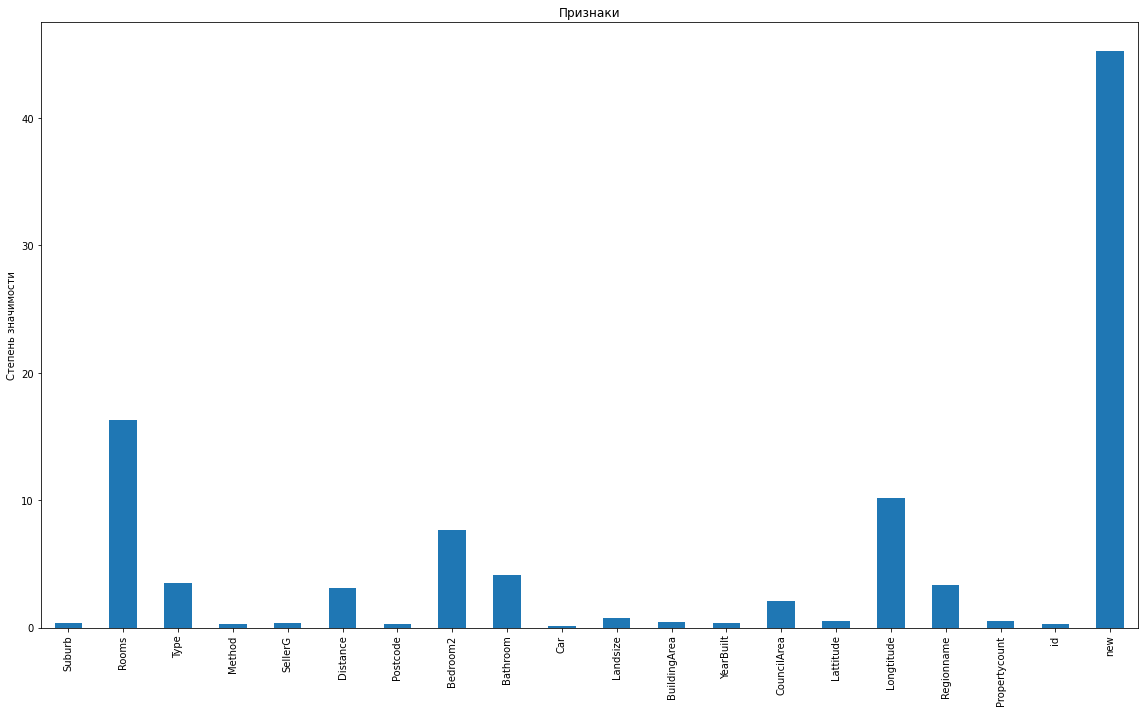

In [ ]:

importances_cat1 = pd.Series(model_cat.feature_importances_,
                         x_train.columns)

fig, ax = plt.subplots(figsize=(16,10))
importances_cat1.plot.bar(ax=ax)
ax.set_title("Признаки")
ax.set_ylabel('Степень значимости')
fig.tight_layout()


### Полные данные

In [ ]:
y_full=train['Price']
len(y_full)

18373

In [ ]:
x_full=train.drop(['Price'],axis=1)
len(x_full)

18373

In [ ]:
model_cat_full = CatBoostRegressor(cat_features=cat_features,
                          eval_metric= 'MAPE',
                          iterations=2000,    
                          max_depth=12,     
                          random_seed=9,
                          verbose=200,
                          od_type = "Iter",
                          od_wait = 50)

model_cat_full.fit(x_full,y_full)
predict3= model_cat_full.predict(x_full)

Learning rate set to 0.036913
0:	learn: 0.5188777	total: 1.46s	remaining: 48m 43s
200:	learn: 0.0652241	total: 3m 29s	remaining: 31m 11s
400:	learn: 0.0504737	total: 6m 54s	remaining: 27m 31s
600:	learn: 0.0418324	total: 10m 13s	remaining: 23m 48s
800:	learn: 0.0359816	total: 13m 43s	remaining: 20m 32s
1000:	learn: 0.0311108	total: 17m 20s	remaining: 17m 18s
1200:	learn: 0.0270964	total: 20m 50s	remaining: 13m 52s
1400:	learn: 0.0234703	total: 24m 2s	remaining: 10m 16s
1600:	learn: 0.0205773	total: 27m 30s	remaining: 6m 51s
1800:	learn: 0.0180710	total: 31m 8s	remaining: 3m 26s
1999:	learn: 0.0158767	total: 34m 31s	remaining: 0us


In [ ]:
mean_absolute_percentage_error(y_full, predict3)


0.021534117402257916

In [ ]:
data.info()

In [ ]:
df['Price'] = model_cat_full.predict(df)

### Важность признаков

In [ ]:

importances_cat = pd.Series(model_cat_full.feature_importances_,
                         x_train.columns)

fig, ax = plt.subplots(figsize=(16,10))
importances_cat.plot.bar(ax=ax)
ax.set_title("Признаки")
ax.set_ylabel('Степень значимости')
fig.tight_layout()


### Проверка на адекватность

In [ ]:
dummy = DummyRegressor(strategy='median')

dummy.fit(x_train_ohe, y_train_ohe)


predicted_dummy = dummy.predict(x_train_ohe)

result_dummy=mean_absolute_percentage_error(y_train_ohe, predicted_dummy)

'MAPE базовой модели  ', result_dummy

## Запись результата

In [ ]:
data[['id','Price']].to_csv('C:\data\kollab\my_result.csv',index=False)


In [ ]:
t=pd.read_csv(r'C:\data\kollab\my_result.csv')
t

**Результат, выданный Kagle: 15.66144**